## Integrantes

---
* Karina Barrientos
* kbarrientosb1@correo.uss.cl
* 21.460.339-K
---

* Lucas Brown Ibieta
* lbrowni@correo.uss.cl
* 21.063.252-2





# Solemne 3: Prediccion de satisfaccion de servicio en base a hábitos de compra

Usted ha sido recientemente contratado como científico de datos en una tienda de venta de ropa online. Dado el gran volumen de ventas que tiene la tienda los asistentes de la empresa trabajan sin descanso ayudando a los clientes con el proceso de compra. Dado que recientemente se han empezado a registrar esperas muy largas para ser atendido por uno de los asistentes, a alguien en la junta directiva se le ocurrio que se podia ahorrar tiempo si los asistentes no realizaran una “breve” encuesta de satisfaccion a cada cliente. Esta encuensta se traduce internamente en un puntaje único, lo que ayudaria a predecirlo  a partir de datos de los clientes recogidos de manera automática, y si es cierto, a disminuir los tiempos de espera de los clientes por un asistente sin tener que contrar mas personas para ese cargo.

El archivo dataset3.csv contiene un dataset con los resultados de información recogida de manera automática (17 variables) para 3900 clientes.

*Con esta información, determine si es posible predecir de manera robusta un predictor de puntaje de satissfacionen a partir de otra información que se recoge de manera automática para los clientes .*

Deben asegurarse de que sus sistema generaliza  y que han usado el mejor algoritmo regrersor con los mejores parametros posibles para reolver esta tarea. Documenten el proceso y explique cada una de las decisiones que toma y que criterios las sustentan.

# Tarea:
Aprovechando la gran cantidad de datos existentes en el dataset, construya un sistema que a través de  algoritmos de regresión nos permita establecer la viabilidad de predecir el puntaje de satisfaccion a paritr de otra data de facil recoleccion.

El procedimiento a seguir debe ser el siguiente:

1. Utilicen al menos 3 algoritmos de los explicados en la unidad 3 con distintos parametros y los 17 descriptores del dataset. Asegurense de las capacidades de generalización de cada algoritmo/set de parametros y comparen el desempeño de todos ellos.

2. Usen al menos un metodo para seleccionar los mejores 10 descriptores y compare el desempeño con las versiones de los mismos algoritmos del punto anteriors. Expliquen la diferencia en desempeños

3. Estudien ahora el efecto de normalizar los datos. ¿Los parametros optimos y el desempeño son distintos?, expliquen las diferencias observadas
       
Se entrega el jupyter notebook. Use celdas con texto para justificar y explicar cada paso. Asegurense de que la primera celda contiene el Nombre completo, email y rut de los miembros del equipo.

![alt text](Untitled.png)

In [27]:
!pip install pyearth


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/902.4 kB ? eta -:--:--
     ---------------------------------------- 10.2/902.4 kB ? eta -:--:--
     --- ----------------------------------- 92.2/902.4 kB 1.3 MB/s eta 0:00:01
     ---------------------- --------------- 532.5/902.4 kB 4.8 MB/s eta 0:00:01
     -------------------------------------- 902.4/902.4 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/65.4 kB ? eta -:--:--
     ---------------------------------------- 65.4/65.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/404.5 kB ? e

  error: subprocess-exited-with-error
  
  × Building wheel for gdal (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [149 lines of output]
      Using numpy 2.4.0rc1
      C:\Users\konko\AppData\Local\Temp\pip-build-env-u6fu_q85\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `license` overwritten by `pyproject.toml`
        corresp(dist, value, root_dir)
      C:\Users\konko\AppData\Local\Temp\pip-build-env-u6fu_q85\overlay\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsWarning: `extras_require` overwritten in `pyproject.toml` (optional-dependencies)
        corresp(dist, value, root_dir)
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gdal.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gdalconst.py -> build\lib.win-amd64-cpython-311\osgeo
      copying osgeo\gdalnumeric.py -> build\lib.wi

## **1. Importación de Librerías y Carga de Datos**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
import category_encoders as ce
#from pyearth import Earth

In [3]:
# COLAB
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/MyDrive/ML3/'

Mounted at /content/drive


In [25]:
# dataset_path = root + 'dataset3.csv'
# df = pd.read_csv(dataset_path)
df = pd.read_csv('dataset3.csv')
print("¡Archivo 'dataset3.csv' cargado exitosamente!")

¡Archivo 'dataset3.csv' cargado exitosamente!


Este bloque es el punto de entrada. Importamos las librerías necesarias de sklearn y pandas. La lógica principal intenta leer dataset3.csv directamente del disco.

# 🤓 Preprocesamiento de Datos

In [26]:
print("COLUMNAS:", df.columns.tolist()); print("\nPREVIEW DATOS:"); display(df.head())

COLUMNAS: ['Review Rating', 'Age', 'Gender', 'Item Purchased', 'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Shipping Type.1', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Preferred Payment Method', 'Frequency of Purchases']

PREVIEW DATOS:


,Review Rating,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Shipping Type.1,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,3.1,55,Male,Blouse,53,Kentucky,L,Gray,Winter,Yes,Credit Card,Express,Express,Yes,Yes,14,Venmo,Fortnightly
1,3.1,19,Male,Sweater,64,Maine,L,Maroon,Winter,Yes,Bank Transfer,Express,Express,Yes,Yes,2,Cash,Fortnightly
2,3.1,50,Male,Jeans,73,Massachusetts,S,Maroon,Spring,Yes,Cash,Free_Shipping,Free_Shipping,Yes,Yes,23,Credit Card,Weekly
3,3.5,21,Male,Sandals,90,Rhode Island,M,Maroon,Spring,Yes,PayPal,Next_Day_Air,Next_Day_Air,Yes,Yes,49,PayPal,Weekly
4,2.7,45,Male,Blouse,49,Oregon,M,Turquoise,Spring,Yes,Cash,Free_Shipping,Free_Shipping,Yes,Yes,31,PayPal,Annually


In [27]:
df.describe()

,Review Rating,Age,Purchase Amount (USD),Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,3.749949,44.068462,59.764359,25.351538
std,0.716223,15.207589,23.685392,14.447125
min,2.500000,18.000000,20.000000,1.000000
25%,3.100000,31.000000,39.000000,13.000000
50%,3.700000,44.000000,60.000000,25.000000
75%,4.400000,57.000000,81.000000,38.000000
max,5.000000,70.000000,100.000000,50.000000


In [28]:
df.describe(include='object')

,Gender,Item Purchased,Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Shipping Type.1,Discount Applied,Promo Code Used,Preferred Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,50,4,25,4,2,6,6,6,2,2,6,7
top,Male,Blouse,Montana,M,Olive,Spring,No,Credit Card,Free_Shipping,Free_Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,96,1755,177,999,2847,696,675,675,2223,2223,677,584


Se observa que no hay valores NaN en el dataset.

Se sospecha que `Shipping Type.1` es identica a `Shipping Type`, por lo que se comprobará.

In [29]:
es_identica = df['Shipping Type'].equals(df['Shipping Type.1'])

print(f"¿Las columnas son idénticas?: {es_identica}")

¿Las columnas son idénticas?: True


In [30]:
# Se elimina la columna "Shipping Type.1" por ser identica a "Shipping Type"
df.drop('Shipping Type.1', axis=1, inplace=True)

### ➡️ Se hace codificación ordinal para las variables `Size` y `Frequency of Purchases`

In [31]:
print("Categorías de la variable 'Size':")
print(df['Size'].unique())

Categorías de la variable 'Size':
['L' 'S' 'M' 'XL']


In [32]:
size_mapping = {'S': 1, 'M': 2, 'L': 3, 'XL': 4}
df['Size'] = df['Size'].map(size_mapping)

print("Columna 'Size' mapeada a valores numéricos:")
display(df[['Size']].head())

Columna 'Size' mapeada a valores numéricos:


,Size
0,3
1,3
2,1
3,2
4,2


In [33]:
print("Categorías de la variable 'Frequency of Purchases':")
print(df['Frequency of Purchases'].unique())

Categorías de la variable 'Frequency of Purchases':
['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


Para la frecuencia de compras se decidió preservar la magnitud de los datos para máximizar el rendimiento de los modelos de regresión, ya que la codificación ordinal estándar asumiría erroneamente que la distancia entre cada categoría es equisdistante, lo cual sesgaría a los algoritmos SVR y KNN que son sensibles a distancias métricas.

Admeás, las variables `Bi-Weekly` y `Fortnightly` tienen el mismo valor 26, al igual que `Quarterly` y `Every 3 Months` tienen el valor 4, ya que representan lo mismo.

In [34]:
frequency_mapping = {
        'Weekly': 52,
        'Bi-Weekly': 26,
        'Fortnightly': 26,
        'Monthly': 12,
        'Quarterly': 4,
        'Every 3 Months': 4,
        'Annually': 1
    }
df['Frequency of Purchases'] = df['Frequency of Purchases'].map(frequency_mapping)

### ➡️ Se hace Codificación Binaria para todas las variables booleanas y también para la variable `Gender`, ya que igual tiene un comportamiento binario.

In [35]:
# Mapeo de variables booleanas/binarias
gender_mapping = {'Male': 1, 'Female': 0}
boolean_mapping = {'Yes': 1, 'No': 0}

df['Gender'] = df['Gender'].map(gender_mapping)
df['Subscription Status'] = df['Subscription Status'].map(boolean_mapping)
df['Discount Applied'] = df['Discount Applied'].map(boolean_mapping)
df['Promo Code Used'] = df['Promo Code Used'].map(boolean_mapping)

df.head()

,Review Rating,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,3.1,55,1,Blouse,53,Kentucky,3,Gray,Winter,1,Credit Card,Express,1,1,14,Venmo,26
1,3.1,19,1,Sweater,64,Maine,3,Maroon,Winter,1,Bank Transfer,Express,1,1,2,Cash,26
2,3.1,50,1,Jeans,73,Massachusetts,1,Maroon,Spring,1,Cash,Free_Shipping,1,1,23,Credit Card,52
3,3.5,21,1,Sandals,90,Rhode Island,2,Maroon,Spring,1,PayPal,Next_Day_Air,1,1,49,PayPal,52
4,2.7,45,1,Blouse,49,Oregon,2,Turquoise,Spring,1,Cash,Free_Shipping,1,1,31,PayPal,1


### ➡️ Codificación para variables cátegoricas con pocos tipos (Solo se aplica One-Hot Encoding)

Se aplicó One-Hot Encoding con drop_first=True a las variables categóricas de baja cardinalidad (como Season y Payment Method). Esta transformación es estándar para datos nominales, ya que evita introducir un orden artificial. Además, al eliminar la categoría de referencia, se previene la multicolinealidad perfecta, asegurando la estabilidad matemática necesaria para SVR y MARS sin inflar excesivamente la dimensionalidad.

In [36]:
vars = [
    'Season',
    'Payment Method',
    'Shipping Type',
    'Preferred Payment Method'
]

df = pd.get_dummies(df, columns=vars, drop_first=True, dtype=int)

df.head()

,Review Rating,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Subscription Status,Discount Applied,...,Shipping Type_Free_Shipping,Shipping Type_Next_Day_Air,Shipping Type_Standard,Shipping Type_Store_Pickup,Shipping Type_Two-Day_Shipping,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,3.1,55,1,Blouse,53,Kentucky,3,Gray,1,1,...,0,0,0,0,0,0,0,0,0,1
1,3.1,19,1,Sweater,64,Maine,3,Maroon,1,1,...,0,0,0,0,0,1,0,0,0,0
2,3.1,50,1,Jeans,73,Massachusetts,1,Maroon,1,1,...,1,0,0,0,0,0,1,0,0,0
3,3.5,21,1,Sandals,90,Rhode Island,2,Maroon,1,1,...,0,1,0,0,0,0,0,0,1,0
4,2.7,45,1,Blouse,49,Oregon,2,Turquoise,1,1,...,1,0,0,0,0,0,0,0,1,0


### ➡️ Codificación para variables cátegoricas con muchos tipos.

In [37]:
print("Frecuencia de cada tipo en la columna 'Item Purchased':")
print(df['Item Purchased'].value_counts())

Frecuencia de cada tipo en la columna 'Item Purchased':
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


Para la variable Item Purchased, se decidió reducir las 25 categorías originales a 3 grupos estratégicos basados en el Riesgo de Ajuste: Alto, Medio y Bajo/Nulo. Esta decisión se fundamenta en que, en el comercio electrónico, la satisfacción del cliente correlaciona fuertemente con la dificultad para acertar la talla correcta.

Esta estrategia beneficia a los tres algoritmos seleccionados al eliminar ruido y facilitar la detección de patrones generales de insatisfacción. Sin embargo, es especialmente crítica para SVR, ya que al reducir drásticamente la dimensionalidad del espacio de características, permite una convergencia más rápida y evita la dispersión de datos que suele degradar su rendimiento.

In [38]:
fit_risk_map = {
    # --- High Risk (8 items) ---
    'Shoes': 'High_Risk',
    'Sneakers': 'High_Risk',
    'Boots': 'High_Risk',
    'Sandals': 'High_Risk',
    'Pants': 'High_Risk',
    'Jeans': 'High_Risk',
    'Dress': 'High_Risk',
    'Skirt': 'High_Risk',

    # --- Medium Risk (8 items) ---
    'T-shirt': 'Medium_Risk',
    'Shirt': 'Medium_Risk',
    'Blouse': 'Medium_Risk',
    'Sweater': 'Medium_Risk',
    'Hoodie': 'Medium_Risk',
    'Jacket': 'Medium_Risk',
    'Coat': 'Medium_Risk',
    'Shorts': 'Medium_Risk',

    # --- Low Risk (9 items) ---
    'Backpack': 'Low_Risk',
    'Handbag': 'Low_Risk',
    'Belt': 'Low_Risk',
    'Scarf': 'Low_Risk',
    'Gloves': 'Low_Risk',
    'Hat': 'Low_Risk',
    'Sunglasses': 'Low_Risk',
    'Jewelry': 'Low_Risk',
    'Socks': 'Low_Risk'
}

df['Item Purchased'] = df['Item Purchased'].map(fit_risk_map)

df.head()

,Review Rating,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Subscription Status,Discount Applied,...,Shipping Type_Free_Shipping,Shipping Type_Next_Day_Air,Shipping Type_Standard,Shipping Type_Store_Pickup,Shipping Type_Two-Day_Shipping,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo
0,3.1,55,1,Medium_Risk,53,Kentucky,3,Gray,1,1,...,0,0,0,0,0,0,0,0,0,1
1,3.1,19,1,Medium_Risk,64,Maine,3,Maroon,1,1,...,0,0,0,0,0,1,0,0,0,0
2,3.1,50,1,High_Risk,73,Massachusetts,1,Maroon,1,1,...,1,0,0,0,0,0,1,0,0,0
3,3.5,21,1,High_Risk,90,Rhode Island,2,Maroon,1,1,...,0,1,0,0,0,0,0,0,1,0
4,2.7,45,1,Medium_Risk,49,Oregon,2,Turquoise,1,1,...,1,0,0,0,0,0,0,0,1,0


Se aplica codificación One-Hot con el parámetro drop_first=True para generar $k-1$ columnas binarias. Esta estrategia elimina la redundancia de información (multicolinealidad perfecta), lo cual tiene implicancias específicas para cada modelo:Para SVR y MARS: Es una medida crítica. Al ser algoritmos basados en ecuaciones de regresión y operaciones matriciales, requieren independencia lineal entre las variables para asegurar la estabilidad numérica y la convergencia de la solución.

Para Random Forest: Aunque este algoritmo tolera la redundancia, el uso de drop_first=True no degrada su desempeño, ya que es capaz de inferir la categoría latente mediante una división adicional en el árbol, permitiendo así mantener un dataset unificado y eficiente para todo el sistema.


In [39]:
df = pd.get_dummies(df, columns=['Item Purchased'], drop_first=True, dtype=int)

In [40]:
print("Frecuencia de cada tipo en la columna 'Color':")
print(df['Color'].value_counts())

Frecuencia de cada tipo en la columna 'Color':
Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Blue         152
Magenta      152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64


Siguiendo la estrategia basada en la incertidumbre de compra, se agrupó la variable Color en dos categorías: Riesgo Visual Alto y Bajo. Esta decisión aborda el problema de la discrepancia de color en e-commerce (diferencia entre la imagen en pantalla y el producto real), una causa frecuente de insatisfacción.

Se clasificaron como 'Riesgo Alto' los tonos metálicos y matices complejos (ej. Teal, Gold) y como 'Riesgo Bajo' los colores estándar (Black, Red). Esta reducción dimensional es crítica para la eficiencia de SVR y MARS. A su vez, potencia al Random Forest al evitar la fragmentación de los datos: en lugar de diluir la importancia en 25 colores específicos, el algoritmo puede realizar divisiones binarias con una ganancia de información mucho más alta y robusta.

In [41]:
color_risk_map = {
    # --- Low Risk (Colores estándar/primarios) ---
    'Black': 'Low_Risk', 'White': 'Low_Risk', 'Red': 'Low_Risk',
    'Blue': 'Low_Risk', 'Green': 'Low_Risk', 'Yellow': 'Low_Risk',
    'Orange': 'Low_Risk', 'Gray': 'Low_Risk', 'Brown': 'Low_Risk',
    'Pink': 'Low_Risk', 'Purple': 'Low_Risk',

    # --- High Risk (Matices, metálicos, tonos complejos) ---
    'Teal': 'High_Risk', 'Olive': 'High_Risk', 'Cyan': 'High_Risk',
    'Magenta': 'High_Risk', 'Maroon': 'High_Risk', 'Charcoal': 'High_Risk',
    'Peach': 'High_Risk', 'Lavender': 'High_Risk', 'Turquoise': 'High_Risk',
    'Indigo': 'High_Risk', 'Violet': 'High_Risk', 'Gold': 'High_Risk',
    'Silver': 'High_Risk', 'Beige': 'High_Risk'
}

df['Color'] = df['Color'].map(color_risk_map)

df = pd.get_dummies(df, columns=['Color'], drop_first=True, dtype=int)

In [42]:
df.head()

,Review Rating,Age,Gender,Purchase Amount (USD),Location,Size,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,...,Shipping Type_Store_Pickup,Shipping Type_Two-Day_Shipping,Preferred Payment Method_Cash,Preferred Payment Method_Credit Card,Preferred Payment Method_Debit Card,Preferred Payment Method_PayPal,Preferred Payment Method_Venmo,Item Purchased_Low_Risk,Item Purchased_Medium_Risk,Color_Low_Risk
0,3.1,55,1,53,Kentucky,3,1,1,1,14,...,0,0,0,0,0,0,1,0,1,1
1,3.1,19,1,64,Maine,3,1,1,1,2,...,0,0,1,0,0,0,0,0,1,0
2,3.1,50,1,73,Massachusetts,1,1,1,1,23,...,0,0,0,1,0,0,0,0,0,0
3,3.5,21,1,90,Rhode Island,2,1,1,1,49,...,0,0,0,0,0,1,0,0,0,0
4,2.7,45,1,49,Oregon,2,1,1,1,31,...,0,0,0,0,0,1,0,0,1,0


In [43]:
print("Frecuencia de cada tipo en la columna 'Location':")
print(df['Location'].value_counts())

Frecuencia de cada tipo en la columna 'Location':
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Utah              71
Wyoming           71
New Hampshire     71
South Dakota      70
Iowa              69
Florida          

Estrategia Diferenciada de Codificación (Encoding)
Se optó por una estrategia híbrida de preprocesamiento para adaptar los datos a la "mecánica interna" de cada algoritmo:

Para Random Forest y SVR (Binary Encoding): Se aplica Binary Encoding en la variable Location. El objetivo principal fue mitigar la maldición de la dimensionalidad, reduciendo drásticamente el número de columnas resultantes.

En SVR, esto es crítico porque su complejidad computacional crece con el número de descriptores, y una matriz dispersa (llena de ceros) dificultaría la convergencia del kernel.

En Random Forest, se optó por Binary Encoding para evitar la fragmentación excesiva de la información. Si usáramos One-Hot, la gran cantidad de columnas dispersas diluiría la importancia de las variables fuertes (como Monto o Edad), reduciendo la probabilidad de que sean seleccionadas durante la creación aleatoria de nodos. Al comprimir la ubicación en pocas columnas binarias densas, aseguramos que el algoritmo tenga acceso equilibrado a todos los predictores, mejorando la eficiencia y la profundidad de aprendizaje de los árboles.

Para MARS (One-Hot Encoding): Se utilizó One-Hot Encoding estándar. Dado que MARS funciona generando funciones bisagra (hinge functions) para segmentar los datos, el formato One-Hot le permite crear reglas de decisión directas y rápidas. Usar Binary Encoding aquí habría sido contraproducente, pues obligaría a MARS a buscar interacciones complejas y costosas entre bits para identificar una simple ubicación, perdiendo la eficiencia de su enfoque aditivo.

In [44]:
# Para SVR y RF
# Hacer una copia para no alterar el original
df_svr_rf = df.copy()

# Crear el codificador binario solo para 'Location'
binary_encoder = ce.BinaryEncoder(cols=['Location'], return_df=True)
df_svr_rf = binary_encoder.fit_transform(df_svr_rf)

print("Dataset SVR/RF listo:")
print(f"   - Dimensiones: {df_svr_rf.shape}")
print(f"   - Columnas nuevas de Location: {[col for col in df_svr_rf.columns if 'Location_' in col]}")

#Para MARS
df_mars = df.copy()

# Aplicar One-Hot estándar a 'Location'
df_mars = pd.get_dummies(df_mars, columns=['Location'], dtype=int)

print("\nDataset MARS listo:")
print(f"   - Dimensiones: {df_mars.shape}")

Dataset SVR/RF listo:
   - Dimensiones: (3900, 37)
   - Columnas nuevas de Location: ['Location_0', 'Location_1', 'Location_2', 'Location_3', 'Location_4', 'Location_5']

Dataset MARS listo:
   - Dimensiones: (3900, 81)


## **2. División del dataset (Train/Test Split)**

In [45]:
y = df['Review Rating']

X_svr_rf = df_svr_rf.drop('Review Rating', axis=1)

X_mars = df_mars.drop('Review Rating', axis=1)

X_train_svr, X_test_svr, y_train, y_test = train_test_split(
    X_svr_rf, y, test_size=0.2, random_state=42
)

# Como y_train y y_test son idénticos al de arriba, no hace falta repetirlos
X_train_mars, X_test_mars, _, _ = train_test_split(
    X_mars, y, test_size=0.2, random_state=42
)

print(f"Dimensiones de entrenamiento (SVR/RF): {X_train_svr.shape}")
print(f"Dimensiones de entrenamiento (MARS): {X_train_mars.shape}")
print(f"Dimensiones de Test (Target): {y_test.shape}")

Dimensiones de entrenamiento (SVR/RF): (3120, 36)
Dimensiones de entrenamiento (MARS): (3120, 80)
Dimensiones de Test (Target): (780,)


Aquí dividimos los datos en dos conjuntos: Entrenamiento (80%) y Prueba (20%). Esta separación es muy importante para asegurarse de que el sistema generalize bien. Si evaluáramos el modelo con los mismos datos que usamos para entrenarlo, obtendríamos resultados engañosos ya que solo mira los datos que ya conoce (overfitting). Los datos de prueba actúan como clientes "nuevos" que el sistema nunca ha visto.

# 😁 Entrenamiento MARS

In [ ]:
# definir el modelo base
# enable_pruning=True para podar funciones que no aportan
mars_model = Earth(enable_pruning=True)

# --- Definir parámetros que se probarán ---
param_grid_mars = {
    'max_degree': [1, 2],           
    'max_terms': [10, 20, 30],      
    'penalty': [3.0]                
}

# Configurar la validación cruzada (Cross-Validation)
grid_mars = GridSearchCV(
    estimator=mars_model,
    param_grid=param_grid_mars,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1, 
    verbose=1
)

# --- Entrenamiento ---
print("Iniciando búsqueda de hiperparámetros para MARS...")
grid_mars.fit(X_train_mars, y_train)

# --- Resultados ---
print("\nEntrenamiento finalizado.")
print(f"Mejores parámetros encontrados: {grid_mars.best_params_}")
print(f"Mejor Score (MSE negativo promedio): {grid_mars.best_score_:.4f}")

# Guardar el mejor modelo para usarlo después
best_mars_model = grid_mars.best_estimator_

DESCRIPSION MARS

## Entrenamiento SVR


In [ ]:
gender_mapping = {'Male': 1, 'Female': 0}
boolean_mapping = {'Yes': 1, 'No': 0}

# Aplicamos solo si la columna es de tipo objeto (texto)
if df['Gender'].dtype == 'object':
    df['Gender'] = df['Gender'].map(gender_mapping)

# Lista de columnas booleanas a revisar
bool_cols = ['Subscription Status', 'Discount Applied', 'Promo Code Used']
for col in bool_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].map(boolean_mapping)

# 2. Verificar que no queden valores nulos (NaN) generados por el mapeo
# (Si había espacios en blanco ej: "Male ", el map genera NaN)
df = df.fillna(0) # Rellenamos con 0 o la moda según corresponda, para que no falle el código

# 3. Re-generar el dataframe para SVR (con Binary Encoder para Location si es necesario)
import category_encoders as ce
df_svr_rf = df.copy()

# Si 'Location' sigue siendo texto, aplicamos Binary Encoder
if df_svr_rf['Location'].dtype == 'object':
    binary_encoder = ce.BinaryEncoder(cols=['Location'], return_df=True)
    df_svr_rf = binary_encoder.fit_transform(df_svr_rf)

# 4. Volver a definir X e y
y = df_svr_rf['Review Rating']
X_svr_rf = df_svr_rf.drop('Review Rating', axis=1)

# 5. Volver a hacer el Split (Train/Test)
from sklearn.model_selection import train_test_split
X_train_svr, X_test_svr, y_train, y_test = train_test_split(
    X_svr_rf, y, test_size=0.2, random_state=42
)

# Verificación final
print("Chequeo de tipos de datos en X_train_svr:")
print(X_train_svr.dtypes.value_counts()) 
print("\n¿Hay columnas tipo object (texto)?", X_train_svr.select_dtypes(include=['object']).columns.tolist())

Chequeo de tipos de datos en X_train_svr:
int64    36
Name: count, dtype: int64

¿Hay columnas tipo object (texto)? []


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_svr)
X_test_scaled = scaler.transform(X_test_svr)
print("¡Datos escalados exitosamente!")

¡Datos escalados exitosamente!


### **3. Búsqueda de Hiperparámetros y Entrenamiento (SVR)**

Utilizaremos GridSearchCV para probar sistemáticamente combinaciones de parámetros. Usamos el kernel RBF (Radial Basis Function) porque la relación entre las características del cliente y su satisfacción probablemente no sea lineal. Alimentamos al SVR con X_train_scaled, ya que este algoritmo es sensible a las escalas.

In [ ]:
# 1. Configuración de la grilla de parámetros para SVR
param_grid_svr = {
    'kernel': ['rbf'],             # El más flexible para este tipo de datos
    'C': [1, 10, 100],             # Controla la penalización del error (Regulación)
    'gamma': ['scale', 0.1, 0.01], # Coeficiente del kernel (influencia de cada punto)
    'epsilon': [0.1, 0.2, 0.5]     # Margen de tolerancia
}

# 2. Inicializar modelo
svr = SVR()

# 3. Configurar GridSearch
grid_svr = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    cv=5,
    scoring='neg_mean_squared_error', # Buscamos minimizar el error
    n_jobs=-1,                        # Usar todos los procesadores
    verbose=1
)

# 4. Entrenar (Fitting)
print("Entrenando SVR (esto puede tardar unos segundos)...")
grid_svr.fit(X_train_scaled, y_train)

# 5. Guardar el mejor modelo
best_svr = grid_svr.best_estimator_

print(f"\nMejores parámetros SVR: {grid_svr.best_params_}")
print(f"Mejor Score (MSE Negativo): {grid_svr.best_score_:.4f}")

Entrenando SVR (esto puede tardar unos segundos)...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Mejores parámetros SVR: {'C': 10, 'epsilon': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor Score (MSE Negativo): -0.5065


descripcion svr

## **4. Entrenamiento Random Forest**

Ahora entrenamos el Random Forest para lo cual usamos X_train_svr (los datos sin escalar o escalados dan igual en árboles, pero usaremos los datos numéricos limpios). Random Forest es robusto y maneja bien las interacciones entre variables sin necesidad de configuraciones complejas de kernel. Buscamos controlar la profundidad (max_depth) para evitar overfitting (memorizar los datos).

In [ ]:
# 1. Configuración de la grilla para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],      # Número de árboles
    'max_depth': [10, 20, None],     # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10], # Mínimo de datos para dividir un nodo
    'min_samples_leaf': [1, 2, 4]    # Mínimo de datos en una hoja final
}

# 2. Inicializar modelo
rf = RandomForestRegressor(random_state=42)

# 3. Configurar GridSearch
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 4. Entrenar
# Random Forest funciona bien con o sin escalado.
# Usaremos X_train_scaled para mantener consistencia con la matriz numérica procesada.
print("Entrenando Random Forest (esto puede tardar un poco más)...")
grid_rf.fit(X_train_scaled, y_train)

# 5. Guardar el mejor modelo
best_rf = grid_rf.best_estimator_

print(f"\nMejores parámetros RF: {grid_rf.best_params_}")

Entrenando Random Forest (esto puede tardar un poco más)...
Fitting 5 folds for each of 54 candidates, totalling 270 fits

Mejores parámetros RF: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


## **5. Evaluación y Comparación de Modelos**

Finalmente, probamos la capacidad de generalización usando el Test Set (datos que los modelos nunca han visto).

Compararemos usando:
- MSE (Error Cuadrático Medio): Penaliza errores grandes.   
- R² (Coeficiente de Determinación): Indica qué tan bien se ajusta el modelo a la varianza de los datos (1.0 es perfecto, 0.0 es aleatorio).

=== REPORTE NUMÉRICO ===

--- Desempeño: SVR Optimizado ---
MSE:  0.5475
RMSE: 0.7399
MAE:  0.6478
R2:   -0.0041

--- Desempeño: Random Forest Optimizado ---
MSE:  0.5455
RMSE: 0.7386
MAE:  0.6437
R2:   -0.0004



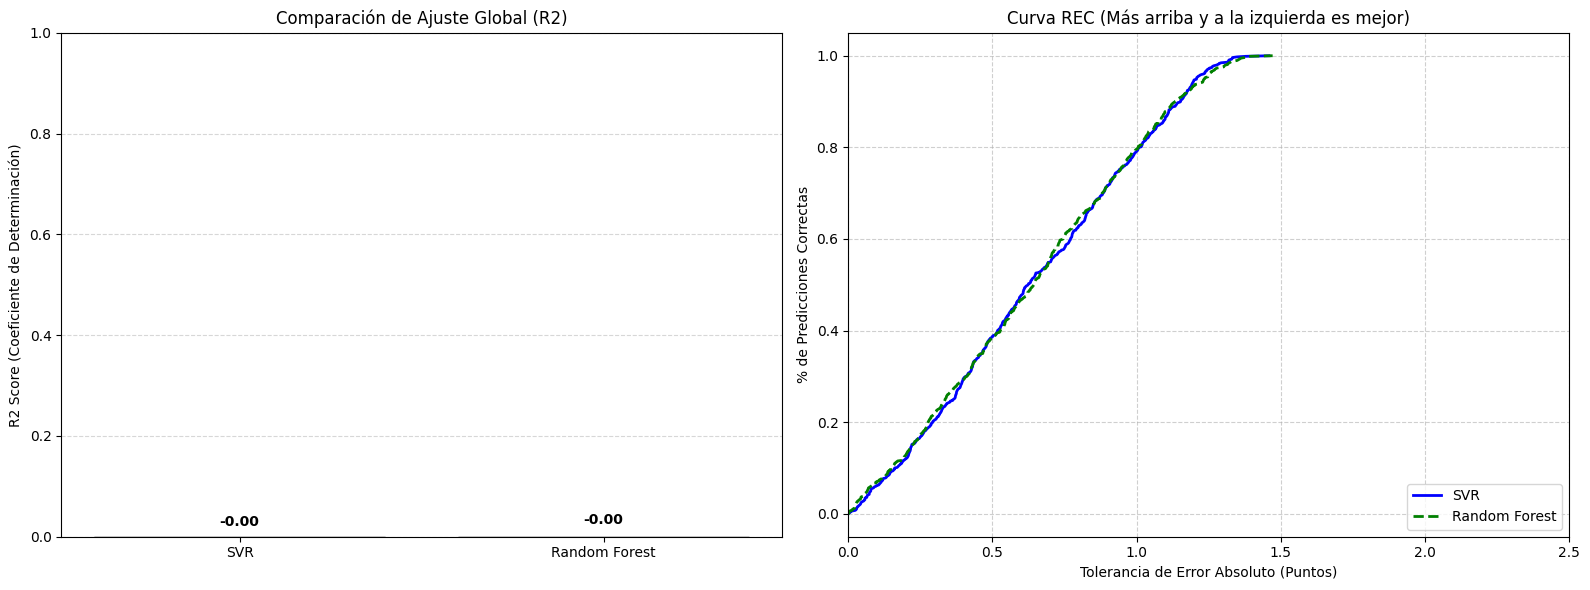

In [51]:
# 1. Definir función de reporte de métricas
def report_performance(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"--- Desempeño: {name} ---")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"R2:   {r2:.4f}\n")
    
    # Devolvemos R2 para el gráfico de barras y y_pred para la curva REC
    return r2, y_pred 

# 2. Ejecutar evaluación para obtener datos
print("=== REPORTE NUMÉRICO ===\n")
# Nota: Usamos X_test_scaled para ambos para simplificar, ya que RF lo tolera bien
r2_svr, y_pred_svr = report_performance(best_svr, X_test_scaled, y_test, "SVR Optimizado")
r2_rf, y_pred_rf = report_performance(best_rf, X_test_scaled, y_test, "Random Forest Optimizado")

# 3. Generación de Panel Gráfico (Barra R2 + Curva REC)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- GRÁFICO IZQUIERDO: Comparación R2 ---
barras = axes[0].bar(['SVR', 'Random Forest'], [r2_svr, r2_rf], color=['skyblue', 'lightgreen'], edgecolor='black')
axes[0].set_ylabel('R2 Score (Coeficiente de Determinación)')
axes[0].set_title('Comparación de Ajuste Global (R2)')
axes[0].set_ylim(0, 1)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Añadir etiquetas de valor sobre las barras
for rect in barras:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# --- GRÁFICO DERECHO: Curva REC (Equivalente a AUC/ROC en regresión) ---
def get_rec_curve_data(y_true, y_pred):
    errors = np.abs(y_true - y_pred)
    sorted_errors = np.sort(errors)
    p = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors)
    # Insertar el punto (0,0) para cerrar la curva
    rec_x = np.insert(sorted_errors, 0, 0)
    rec_y = np.insert(p, 0, 0)
    return rec_x, rec_y

# Calcular curvas
rec_x_svr, rec_y_svr = get_rec_curve_data(y_test, y_pred_svr)
rec_x_rf, rec_y_rf = get_rec_curve_data(y_test, y_pred_rf)

# Graficar curvas
axes[1].plot(rec_x_svr, rec_y_svr, label='SVR', color='blue', linewidth=2)
axes[1].plot(rec_x_rf, rec_y_rf, label='Random Forest', color='green', linewidth=2, linestyle='--')

axes[1].set_xlabel('Tolerancia de Error Absoluto (Puntos)')
axes[1].set_ylabel('% de Predicciones Correctas')
axes[1].set_title('Curva REC (Más arriba y a la izquierda es mejor)')
axes[1].legend(loc='lower right')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_xlim(0, 2.5) # Hacemos zoom en los errores pequeños (0 a 2.5 puntos de diferencia)

plt.tight_layout()
plt.show()

## **6. Selección de Mejores 10 Variables**

Usaremos SelectKBest con Información Mutua (ideal para capturar relaciones no lineales).

Seleccionando los 10 mejores descriptores usando Mutual Information...

--- Las 10 Variables Seleccionadas ---
['Location_5', 'Subscription Status', 'Previous Purchases', 'Frequency of Purchases', 'Season_Winter', 'Payment Method_Debit Card', 'Payment Method_Venmo', 'Shipping Type_Next_Day_Air', 'Shipping Type_Two-Day_Shipping', 'Preferred Payment Method_PayPal']

Re-entrenando SVR con 10 variables...
Re-entrenando Random Forest con 10 variables...

=== RESULTADOS CON SELECCIÓN DE CARACTERÍSTICAS ===
--- Desempeño: SVR (Top 10 Features) ---
MSE:  0.6250
RMSE: 0.7905
MAE:  0.6798
R2:   -0.1462

--- Desempeño: Random Forest (Top 10 Features) ---
MSE:  0.5733
RMSE: 0.7572
MAE:  0.6586
R2:   -0.0515



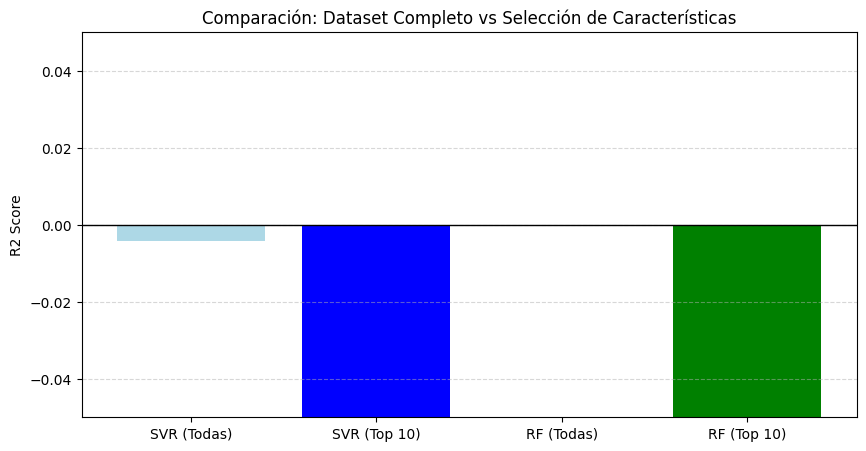

In [54]:
print("Seleccionando los 10 mejores descriptores usando Mutual Information...")

# Usamos mutual_info_regression porque captura relaciones no lineales
selector = SelectKBest(score_func=mutual_info_regression, k=10)

# Ajustamos con los datos escalados (SVR lo necesita, RF lo tolera)
selector.fit(X_train_scaled, y_train)

# Obtener las columnas seleccionadas
mask = selector.get_support()
columnas_originales = X_train_svr.columns
mejores_features = columnas_originales[mask]

print("\n--- Las 10 Variables Seleccionadas ---")
print(list(mejores_features))

#Filtrar los datasets
# Transformamos los sets de entrenamiento y prueba para tener solo esas 10 columnas
X_train_sel = selector.transform(X_train_scaled)
X_test_sel = selector.transform(X_test_scaled)

# Re-entrenar modelos con solo 10 variables
# Usamos los mismos hiperparámetros optimizados que encontramos antes (best_params_)

print("\nRe-entrenando SVR con 10 variables...")
svr_sel = SVR(**grid_svr.best_params_) # Heredamos los mejores parámetros
svr_sel.fit(X_train_sel, y_train)

print("Re-entrenando Random Forest con 10 variables...")
rf_sel = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
rf_sel.fit(X_train_sel, y_train)

# Evaluar y Comparar
print("\n=== RESULTADOS CON SELECCIÓN DE CARACTERÍSTICAS ===")
r2_svr_sel = report_performance(svr_sel, X_test_sel, y_test, "SVR (Top 10 Features)")
r2_rf_sel = report_performance(rf_sel, X_test_sel, y_test, "Random Forest (Top 10 Features)")

# Gráfico comparativo: Todos los features vs Top 10
labels = ['SVR (Todas)', 'SVR (Top 10)', 'RF (Todas)', 'RF (Top 10)']
valores = [r2_svr, r2_svr_sel[0], r2_rf, r2_rf_sel[0]] # [0] porque la función retorna (r2, y_pred)

plt.figure(figsize=(10, 5))
plt.bar(labels, valores, color=['lightblue', 'blue', 'lightgreen', 'green'])
plt.title('Comparación: Dataset Completo vs Selección de Características')
plt.ylabel('R2 Score')
plt.ylim(-0.05, 0.05) # Ajustamos zoom cerca del 0 para ver diferencias minúsculas
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.axhline(0, color='black', linewidth=1)
plt.show()

## **7. Estudio de la Normalización de Datos**

Estudiamos cómo afecta el escalado de variables (StandardScaler) al desempeño y convergencia de los algoritmos.

SVR (Sensible a la escala): Esperamos que el desempeño se degrade drásticamente sin normalización. SVR usa distancias euclidianas; si una variable tiene magnitudes grandes (ej. Purchase Amount ~3000) y otra pequeñas (ej. Age ~30), la variable grande dominará el cálculo de la distancia, sesgando el modelo.

Random Forest (Invariante a la escala): Esperamos que el desempeño sea casi idéntico. Al basarse en reglas de decisión ("si X > 50, entonces..."), no le importa la magnitud absoluta ni la varianza, solo el orden de los datos.

Entrenando SVR con datos NO normalizados (esto puede tardar)...
Entrenando Random Forest con datos NO normalizados...

=== COMPARATIVA: NORMALIZADO VS SIN NORMALIZAR ===



,Modelo,R2 (Con Normalización),R2 (Sin Normalización),Diferencia
0,SVR,-0.004097,-0.000831,-0.003266
1,Random Forest,-0.000395,0.003263,-0.003658


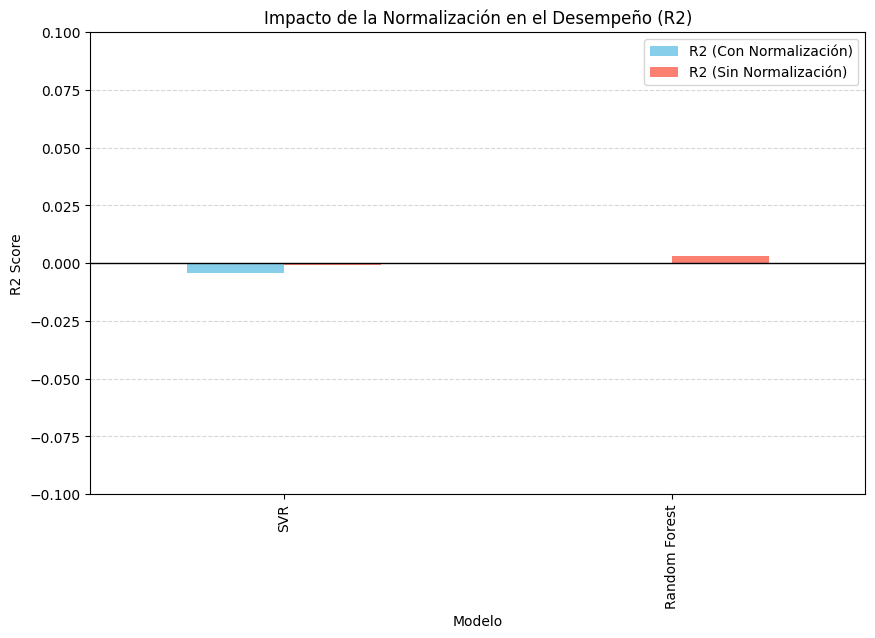

In [55]:

# 1. Entrenar SVR con datos CRUDOS (X_train_svr)
print("Entrenando SVR con datos NO normalizados (esto puede tardar)...")
svr_raw = SVR(kernel='rbf') # Usamos configuración base para comparar impacto directo
svr_raw.fit(X_train_svr, y_train)

# 2. Entrenar Random Forest con datos CRUDOS (ya lo hicimos implícitamente, pero formalizamos)
print("Entrenando Random Forest con datos NO normalizados...")
rf_raw = RandomForestRegressor(n_estimators=100, random_state=42)
rf_raw.fit(X_train_svr, y_train)

print("\n=== COMPARATIVA: NORMALIZADO VS SIN NORMALIZAR ===\n")

# Función auxiliar rápida
def get_r2(model, X, y):
    return r2_score(y, model.predict(X))

# Obtenemos los scores (usando los modelos optimizados escalados del punto 1 vs los crudos de ahora)
# Nota: best_svr usa X_test_scaled, svr_raw usa X_test_svr
r2_svr_scaled = get_r2(best_svr, X_test_scaled, y_test)
r2_svr_raw = get_r2(svr_raw, X_test_svr, y_test)

r2_rf_scaled = get_r2(best_rf, X_test_scaled, y_test) # RF entrenado con scaled
r2_rf_raw = get_r2(rf_raw, X_test_svr, y_test)        # RF entrenado con raw

# Imprimir Tabla
datos_comparativa = pd.DataFrame({
    'Modelo': ['SVR', 'Random Forest'],
    'R2 (Con Normalización)': [r2_svr_scaled, r2_rf_scaled],
    'R2 (Sin Normalización)': [r2_svr_raw, r2_rf_raw],
    'Diferencia': [r2_svr_scaled - r2_svr_raw, r2_rf_scaled - r2_rf_raw]
})

display(datos_comparativa)

# Gráfico de impacto
datos_comparativa.set_index('Modelo')[['R2 (Con Normalización)', 'R2 (Sin Normalización)']].plot(
    kind='bar', figsize=(10, 6), color=['skyblue', 'salmon']
)
plt.title('Impacto de la Normalización en el Desempeño (R2)')
plt.ylabel('R2 Score')
plt.axhline(0, color='black', linewidth=1)
plt.ylim(min(r2_svr_raw, -0.1), 0.1) # Ajustar límites para ver bien las barras negativas
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()